# Trabajo Práctico 1

Karen Raczkowski

In [59]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline  
#%matplotlib qt
# Importar librerías
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Parte 1

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [16]:
# Cargar las imágenes
img_1 = cv2.imread("./coord_cromaticas/CoordCrom_1.png")
img_2 = cv2.imread("./coord_cromaticas/CoordCrom_2.png")
img_3 = cv2.imread("./coord_cromaticas/CoordCrom_3.png")

# Obtener el tamaño en píxeles de cada imagen
height_1, width_1 = img_1.shape[:2]
height_2, width_2 = img_2.shape[:2]
height_3, width_3 = img_3.shape[:2]

print("Tamaño de la imagen 1:", width_1, "x", height_1)
print("Tamaño de la imagen 2:", width_2, "x", height_2)
print("Tamaño de la imagen 3:", width_3, "x", height_3)

Tamaño de la imagen 1: 908 x 996
Tamaño de la imagen 2: 908 x 996
Tamaño de la imagen 3: 908 x 996


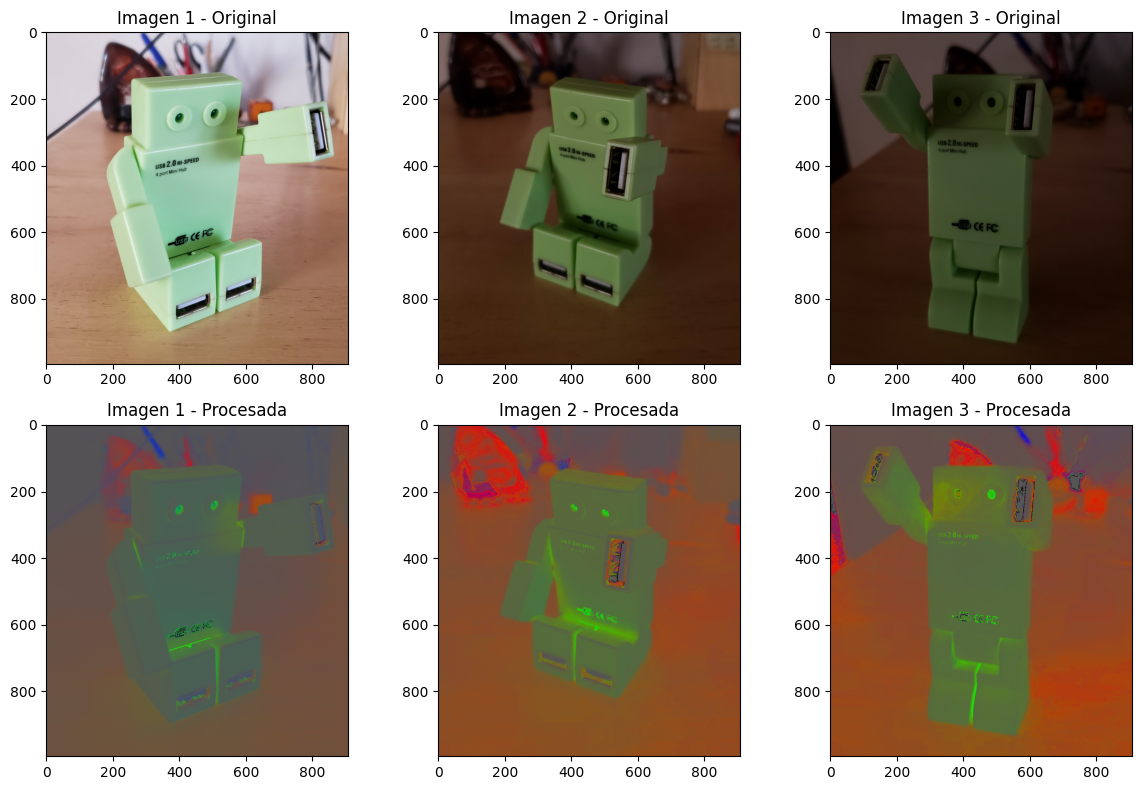

In [22]:
def chromatic_coordinates(input_image: np.ndarray) -> np.ndarray:
    h, w, _ = input_image.shape
    img_output = np.zeros(input_image.shape, np.float32)
    input_image = input_image.astype(np.float32)

    for i in range(h):
        for j in range(w):
            r = input_image[i, j][0]
            g = input_image[i, j][1]
            b = input_image[i, j][2]
            sum_rgb = r + g + b
            if sum_rgb != 0:
                img_output[i, j] = (r / sum_rgb, g / sum_rgb, b / sum_rgb)

    img_output = (img_output * 255).astype(np.uint8)
    return img_output

# Aplicar el algoritmo de coordenadas cromáticas a cada imagen
output_1 = chromatic_coordinates(img_1)
output_2 = chromatic_coordinates(img_2)
output_3 = chromatic_coordinates(img_3)

# Crear una figura con dos filas y tres columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Mostrar las imágenes originales en la parte superior
axes[0, 0].imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Imagen 1 - Original')
axes[0, 1].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Imagen 2 - Original')
axes[0, 2].imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))
axes[0, 2].set_title('Imagen 3 - Original')

# Mostrar las imágenes procesadas en la parte inferior
axes[1, 0].imshow(cv2.cvtColor(output_1, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Imagen 1 - Procesada')
axes[1, 1].imshow(cv2.cvtColor(output_2, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Imagen 2 - Procesada')
axes[1, 2].imshow(cv2.cvtColor(output_3, cv2.COLOR_BGR2RGB))
axes[1, 2].set_title('Imagen 3 - Procesada')

plt.tight_layout()
plt.show()

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [27]:
def white_patch(img):
    # Convertir la imagen de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Obtener los valores máximos de los canales R, G y B
    max_r = np.max(img_rgb[:, :, 0])
    max_g = np.max(img_rgb[:, :, 1])
    max_b = np.max(img_rgb[:, :, 2])

    # Normalizar los canales dividiendo por los valores máximos
    img_normalized = img_rgb.astype(np.float32) / np.array([max_r, max_g, max_b])

    # Asegurar que los valores normalizados estén en el rango [0, 1]
    img_normalized = np.clip(img_normalized, 0, 1)

    # Convertir la imagen de nuevo a BGR
    img_normalized_bgr = cv2.cvtColor(img_normalized, cv2.COLOR_RGB2BGR)

    return img_normalized_bgr

# Cargar la imagen
img_b = cv2.imread("./white_patch/test_blue.png")
img_g = cv2.imread("./white_patch/test_green.png")
img_r = cv2.imread("./white_patch/test_red.png")
img_b2 = cv2.imread("./white_patch/wp_blue.jpg")
img_g2 = cv2.imread("./white_patch/wp_green.png")
img_g3 = cv2.imread("./white_patch/wp_green2.jpg")
img_r2 = cv2.imread("./white_patch/wp_red.png")
img_r3 = cv2.imread("./white_patch/wp_red2.jpg")

# Aplicar el algoritmo White Patch a cada imagen
# Definir un diccionario de imágenes originales
original_images = {'img_b': img_b, 'img_g': img_g, 'img_r': img_r,'img_b2': img_b2, 'img_g2': img_g2, 'img_g3': img_g3,'img_r2': img_r2, 'img_r3': img_r3}

# Aplicar el algoritmo White Patch a cada imagen en un bucle
normalized_images = {}
for key, img in original_images.items():
    normalized_img = white_patch(img)
    normalized_images[key + '_normalized'] = normalized_img

# Mostrar las imágenes originales y normalizadas
normalized_images = {key: normalized_images[key + '_normalized'] for key in original_images}

# Mostrar las imágenes originales y normalizadas en un bucle
for key, img in original_images.items():
    img_normalized = normalized_images[key]
    cv2.imshow(f'Imagen original - {key}', img)
    cv2.imshow(f'Imagen normalizada - {key}', img_normalized)
    cv2.waitKey(0)

# Cerrar todas las ventanas emergentes al final
cv2.destroyAllWindows()

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch

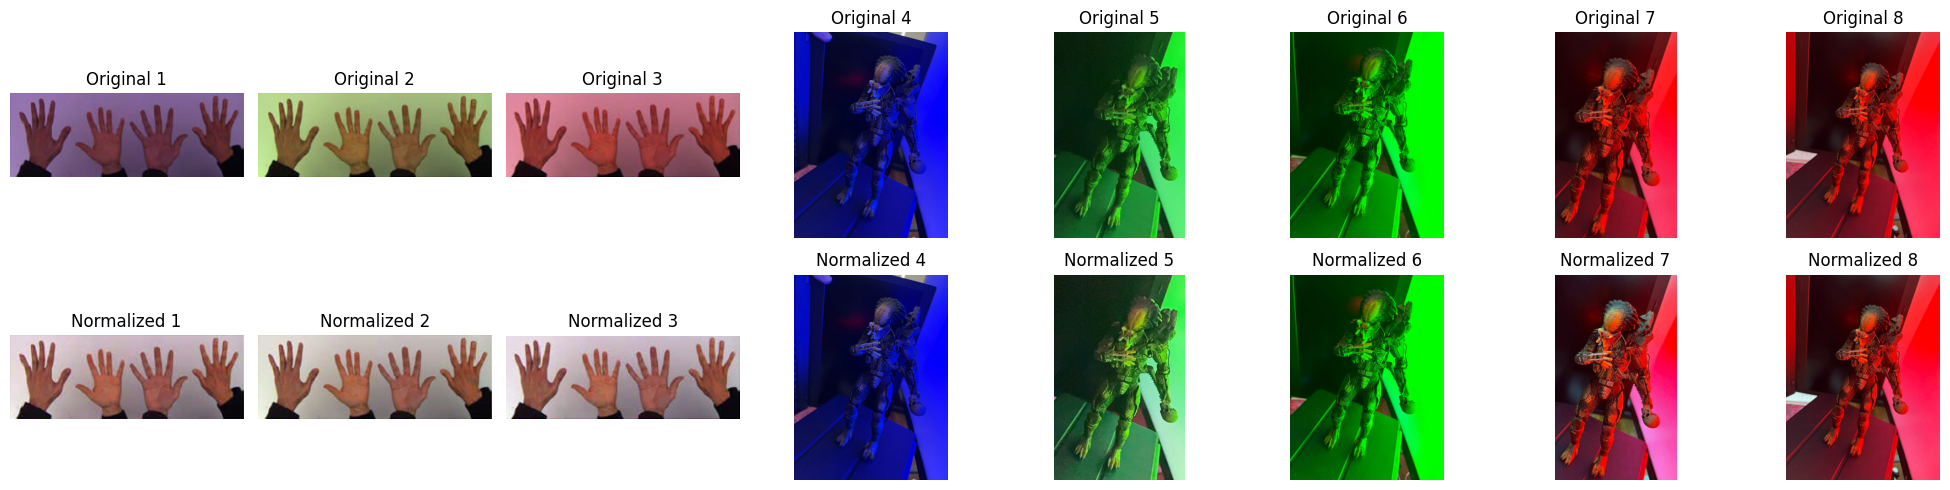

In [29]:
# Mostrar las imágenes originales y normalizadas en una cuadrícula
fig, axes = plt.subplots(2, 8, figsize=(20, 5))

for i, (key, original_img) in enumerate(original_images.items()):
    normalized_img = normalized_images[key]
    
    # Mostrar imagen original
    axes[0, i].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    axes[0, i].set_title(f'Original {i+1}')
    axes[0, i].axis('off')
    
    # Mostrar imagen normalizada
    axes[1, i].imshow(cv2.cvtColor(normalized_img, cv2.COLOR_BGR2RGB))
    axes[1, i].set_title(f'Normalized {i+1}')
    axes[1, i].axis('off')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

Se puede observar que para las primeras 3 imágenes, el algoritmo parece funcionar. Sin embargo, las correcciones no son significativas en las últlimas 5 imágenes. En imágenes con una dominancia de un color particular (azul, verde, rojo), como ocurre en las últimas 5 imágenes, la aplicación del algoritmo White Patch no produce una corrección de color significativa. Esto se debe a que el algoritmo se basa en la suposición de que el píxel más brillante en la imagen es un blanco ideal y normaliza los canales de color dividiéndolos por los valores máximos. Si la imagen ya tiene una dominancia de un color específico, la suposición de un blanco ideal no se cumple, los valores máximos de los canales correspondientes ya serán altos, y dividir los canales por estos valores no resultará en una reducción significativa de la dominancia del color. Como resultado, la imagen procesada seguirá mostrando una fuerte presencia de ese color.

A continuación se analiza la dominancia de color en las últimas 5 imágenes.

In [30]:
# Función para analizar la dominancia de color
def analyze_color_dominance(image):
    avg_blue = np.mean(image[:, :, 0])
    avg_green = np.mean(image[:, :, 1])
    avg_red = np.mean(image[:, :, 2])

    if avg_red > avg_green and avg_red > avg_blue:
        return "Dominancia de color rojo"
    elif avg_green > avg_red and avg_green > avg_blue:
        return "Dominancia de color verde"
    elif avg_blue > avg_red and avg_blue > avg_green:
        return "Dominancia de color azul"
    else:
        return "Sin dominancia clara de color"

# Analizar la dominancia de color en cada imagen
dominance_b2 = analyze_color_dominance(img_b2)
dominance_g2 = analyze_color_dominance(img_g2)
dominance_g3 = analyze_color_dominance(img_g3)
dominance_r2 = analyze_color_dominance(img_r2)
dominance_r3 = analyze_color_dominance(img_r3)

# Imprimir los resultados
print("Imagen wp_blue.jpg:", dominance_b2)
print("Imagen wp_green.png:", dominance_g2)
print("Imagen wp_green2.jpg:", dominance_g3)
print("Imagen wp_red.png:", dominance_r2)
print("Imagen wp_red2.jpg:", dominance_r3)

Imagen wp_blue.jpg: Dominancia de color azul
Imagen wp_green.png: Dominancia de color verde
Imagen wp_green2.jpg: Dominancia de color verde
Imagen wp_red.png: Dominancia de color rojo
Imagen wp_red2.jpg: Dominancia de color rojo


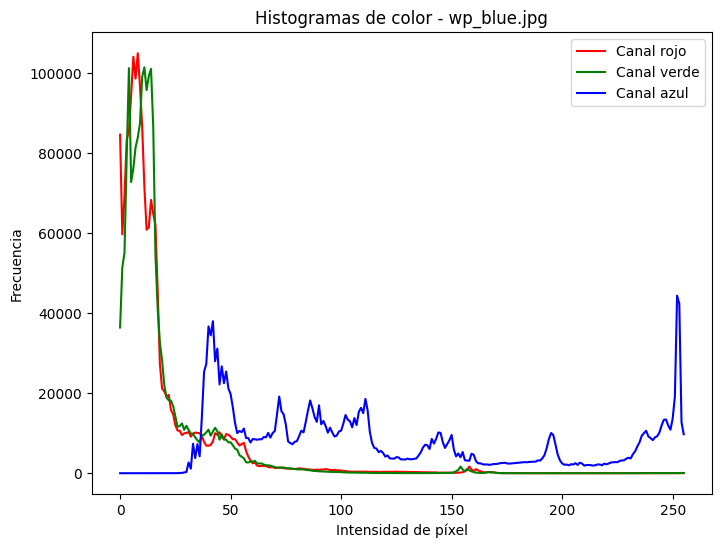

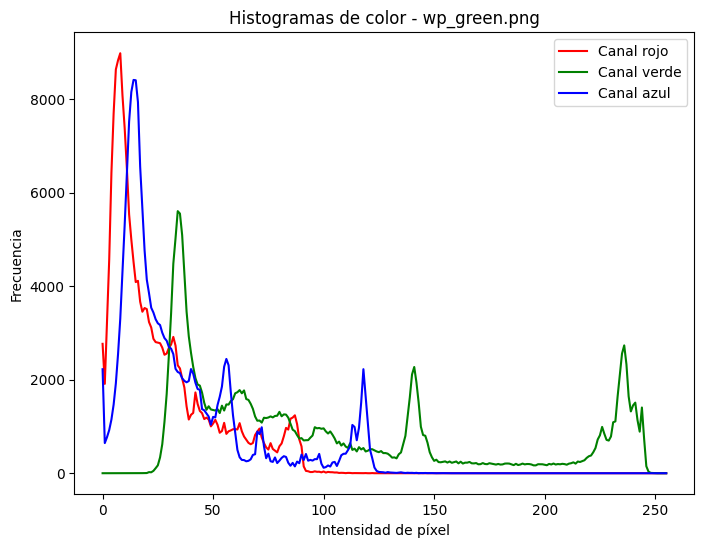

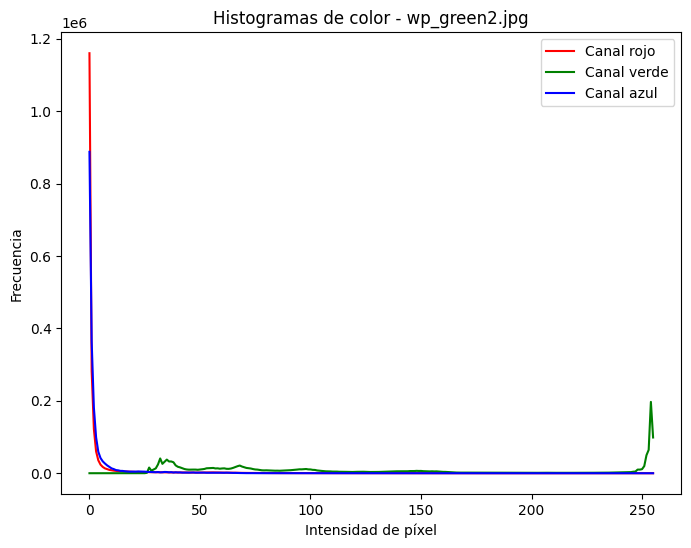

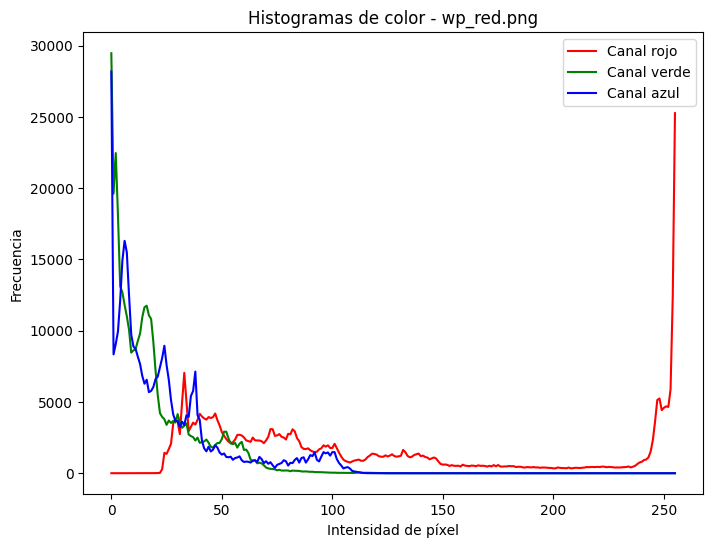

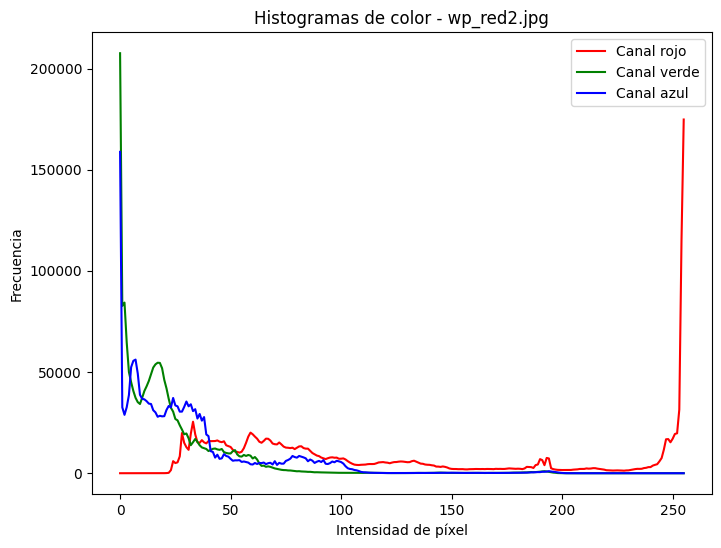

In [31]:
# Calcular y visualizar los histogramas de color de cada imagen
images = [
    {"image": img_b2, "name": "wp_blue.jpg"},
    {"image": img_g2, "name": "wp_green.png"},
    {"image": img_g3, "name": "wp_green2.jpg"},
    {"image": img_r2, "name": "wp_red.png"},
    {"image": img_r3, "name": "wp_red2.jpg"}
]

for img_data in images:
    img = img_data["image"]
    img_name = img_data["name"]

    # Convertir la imagen de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Calcular los histogramas de cada canal de color
    hist_r = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    hist_b = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])

    # Visualizar los histogramas
    plt.figure(figsize=(8, 6))
    plt.plot(hist_r, color='r', label='Canal rojo')
    plt.plot(hist_g, color='g', label='Canal verde')
    plt.plot(hist_b, color='b', label='Canal azul')
    plt.xlabel('Intensidad de píxel')
    plt.ylabel('Frecuencia')
    plt.title(f'Histogramas de color - {img_name}')
    plt.legend()
    plt.show()

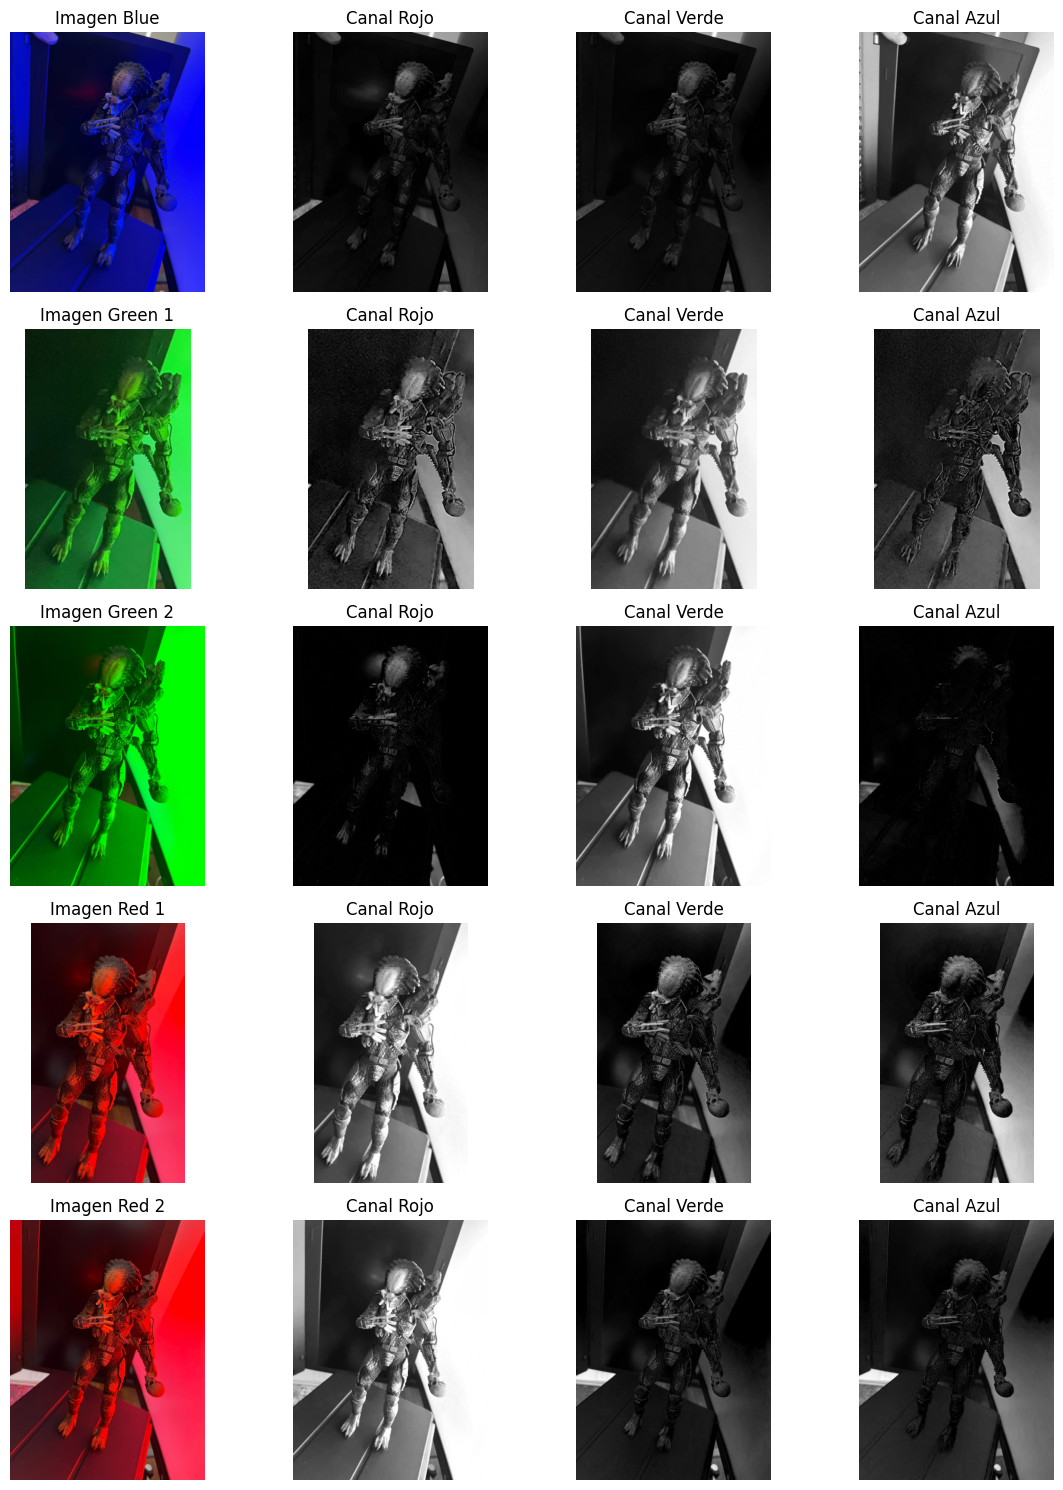

In [32]:
titles = ["Imagen Blue","Imagen Green 1","Imagen Green 2","Imagen Red 1","Imagen Red 2"]
images = [img_b2,img_g2,img_g3,img_r2,img_r3]

# Crear una figura y ejes de subfiguras
fig, axs = plt.subplots(len(images), 4, figsize=(12, 15))

# Recorrer las imágenes y mostrar los canales de color
for i, img in enumerate(images):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
    title = titles[i]

    axs[i, 0].imshow(img_rgb)
    axs[i, 0].set_title(title)
    axs[i, 0].axis('off')

    axs[i, 1].imshow(img_rgb[:, :, 0], cmap='gray')
    axs[i, 1].set_title('Canal Rojo')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(img_rgb[:, :, 1], cmap='gray')
    axs[i, 2].set_title('Canal Verde')
    axs[i, 2].axis('off')

    axs[i, 3].imshow(img_rgb[:, :, 2], cmap='gray')
    axs[i, 3].set_title('Canal Azul')
    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()

## Parte 2

1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

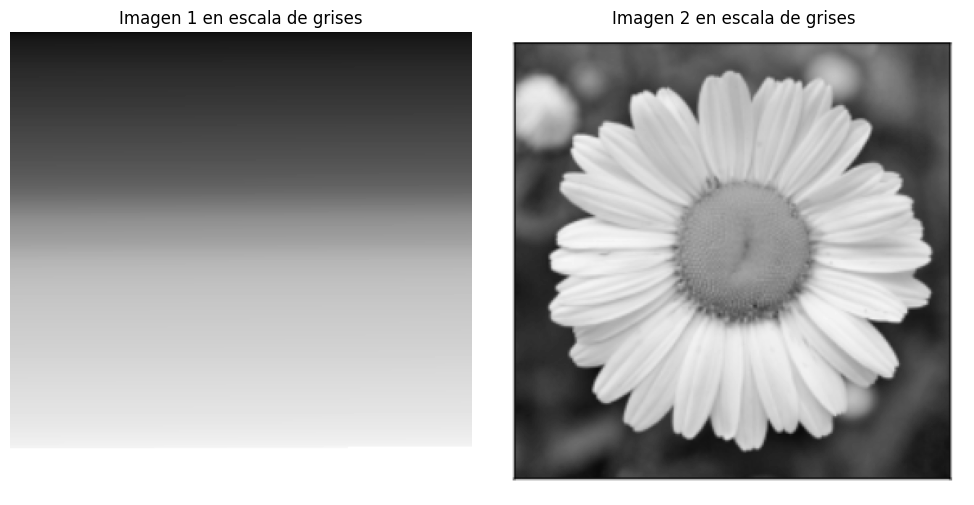

In [33]:
# Leer las imágenes en escala de grises
img1_gray = cv2.imread("./parte2/img1_tp.png", cv2.IMREAD_GRAYSCALE)
img2_gray = cv2.imread("./parte2/img2_tp.png", cv2.IMREAD_GRAYSCALE)

# Visualizar las imágenes
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1_gray, cmap='gray')
plt.title('Imagen 1 en escala de grises')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_gray, cmap='gray')
plt.title('Imagen 2 en escala de grises')
plt.axis('off')

plt.tight_layout()
plt.show()

2. Elija el número de bins que crea conveniente y grafique su histograma, compare los histogramas entre sí. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como 'features' a los histogramas?

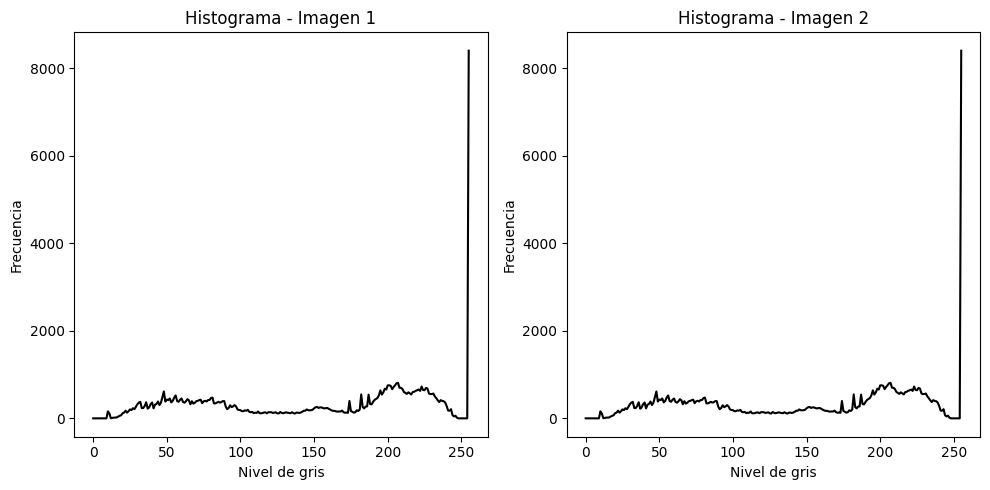

In [36]:
# Definir el número de bins para el histograma
num_bins = 256

# Calcular los histogramas de las imágenes
hist_img1 = cv2.calcHist([img1_gray], [0], None, [num_bins], [0, 256])
hist_img2 = cv2.calcHist([img2_gray], [0], None, [num_bins], [0, 256])

# Graficar los histogramas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(hist_img1, color='black')
plt.title('Histograma - Imagen 1')
plt.xlabel('Nivel de gris')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.plot(hist_img2, color='black')
plt.title('Histograma - Imagen 2')
plt.xlabel('Nivel de gris')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

El parámetro num_bins determina el número de bins (intervalos) en el histograma. En este caso, se establece en 256 para cubrir todos los posibles niveles de gris.

En este caso, si bien las imágenes son diferentes, sus histogramas son muy similares, lo que significa que no hay diferencias significativas en la distribución tonal entre ellas. Entonces, a priori parecería que los histogramas por sí solos no son suficiente para representar adecuadamente las imágenes y serían necesarias otras características adicionales para obtener una representación más completa y discriminativa.

3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando máscaras, las regiones en imágenes separadas.

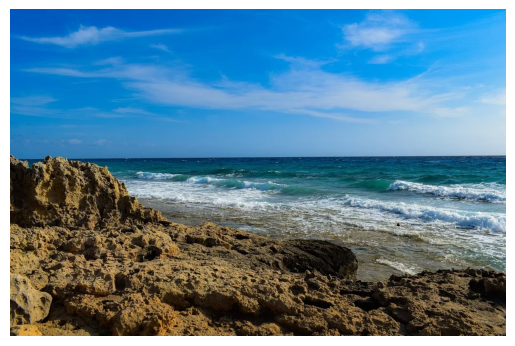

In [56]:
# Leer la imagen
image = cv2.imread("./parte2/segmentacion.png")

# Convertir la imagen de BGR a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen utilizando matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Desactivar los ejes
plt.show()

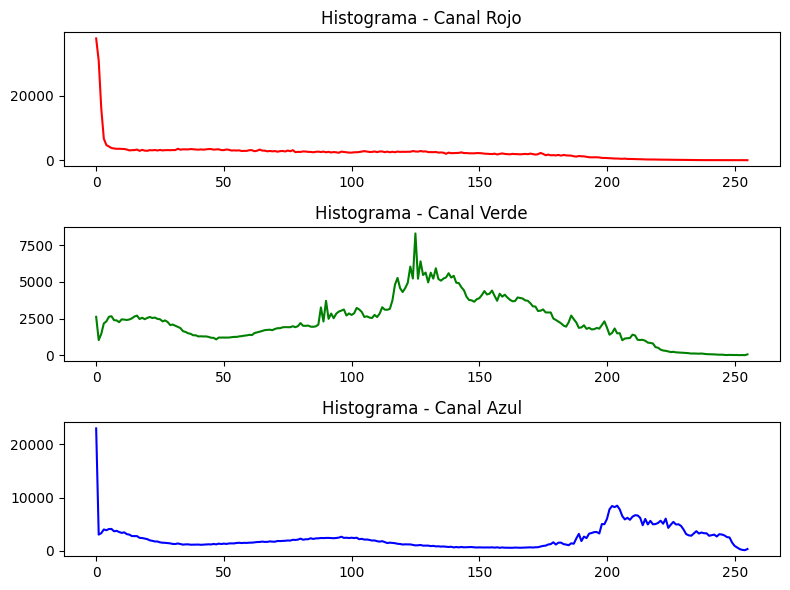

In [44]:
# Calcular los histogramas de los canales RGB
hist_r = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image_rgb], [2], None, [256], [0, 256])

# Crear una figura y subplots para mostrar los histogramas
fig, axes = plt.subplots(3, 1, figsize=(8, 6))

# Mostrar los histogramas de los canales RGB
axes[0].plot(hist_r, color='red')
axes[0].set_title('Histograma - Canal Rojo')
axes[1].plot(hist_g, color='green')
axes[1].set_title('Histograma - Canal Verde')
axes[2].plot(hist_b, color='blue')
axes[2].set_title('Histograma - Canal Azul')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()

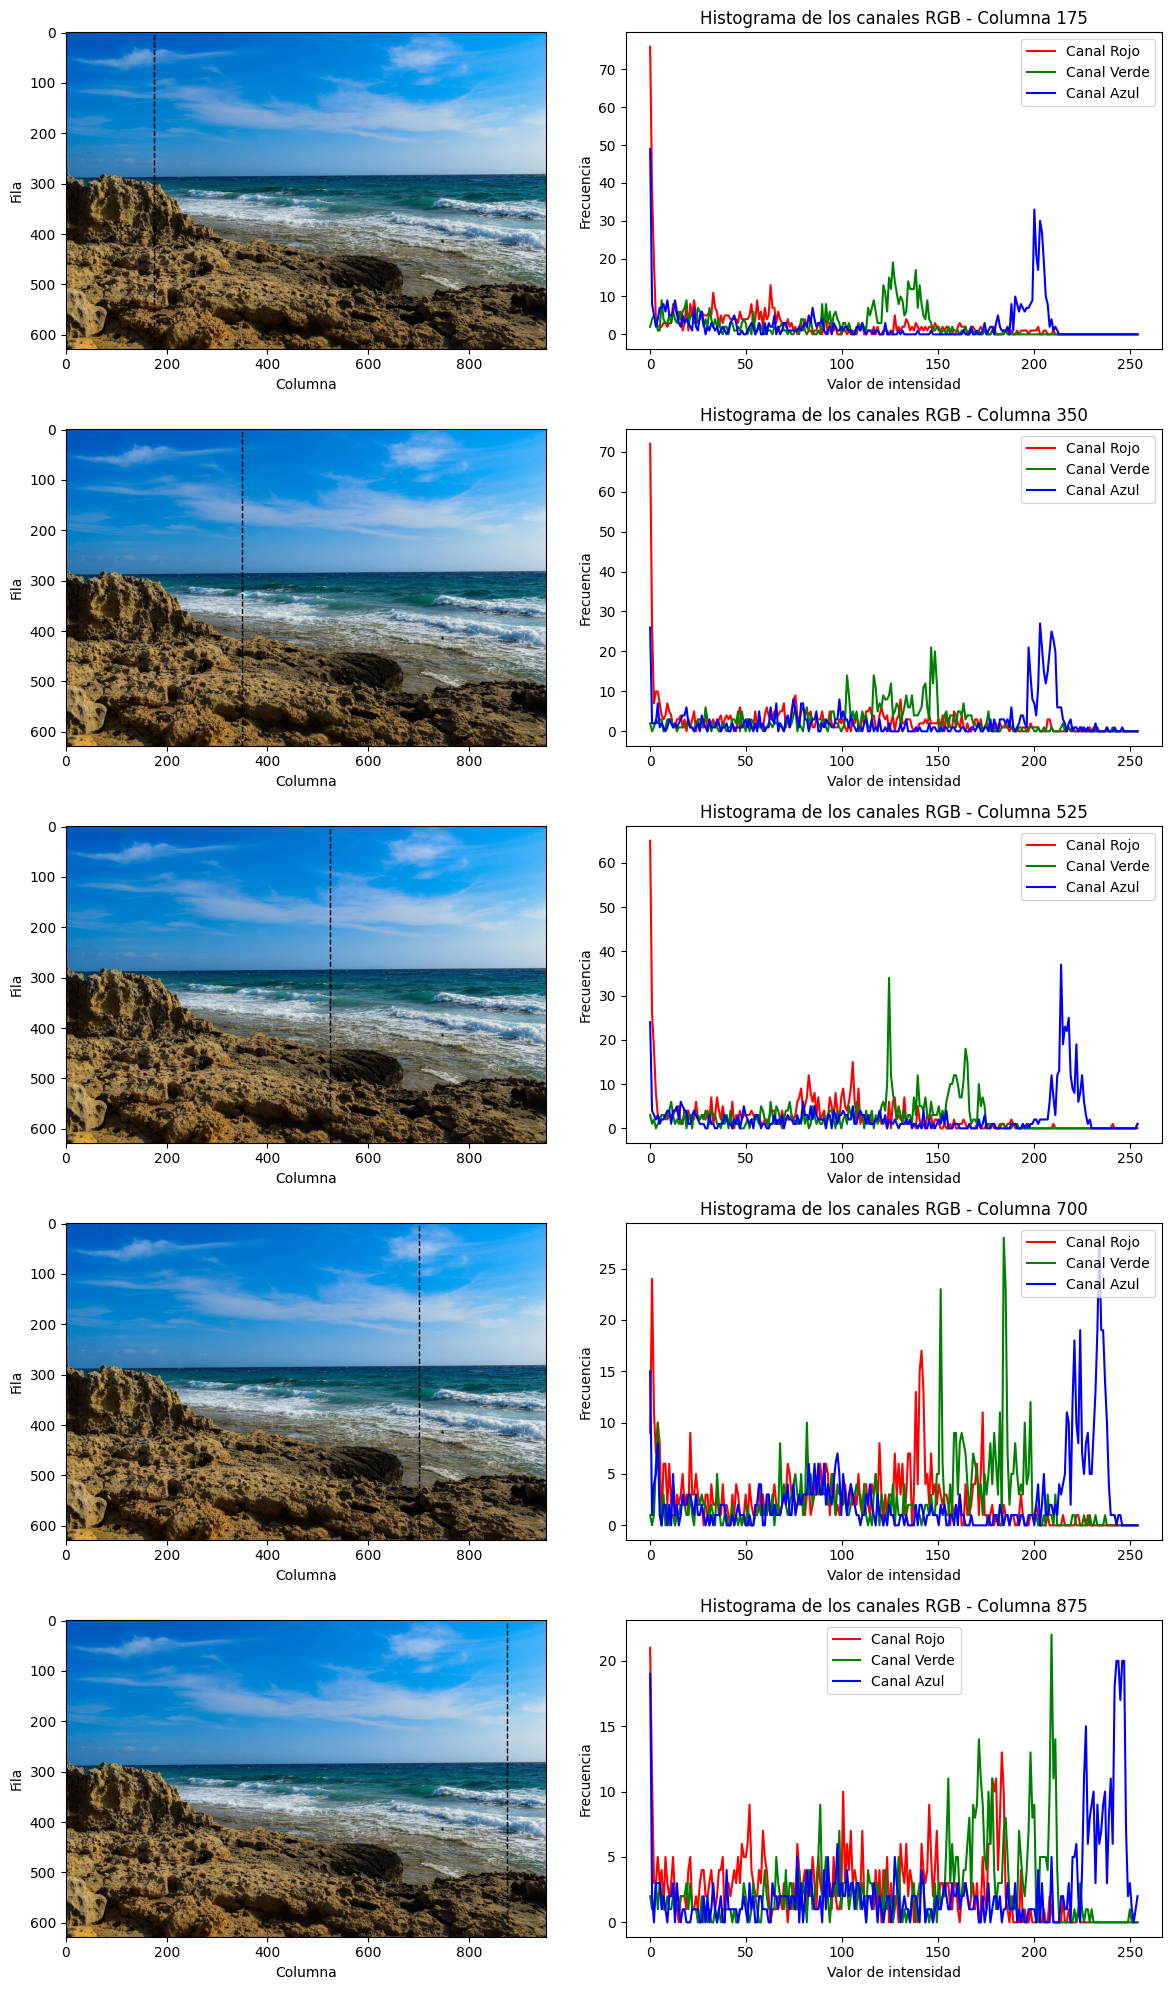

In [68]:
# Crear una figura con múltiples subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 20), gridspec_kw={'width_ratios': [1, 1]})

columnas = [175, 175*2, 175*3, 175*4, 175*5]

# Recorrer los valores de "columna" y generar los gráficos de histograma
for i, columna in enumerate(columnas):
    # Mostrar la imagen marcada en el primer subplot de la fila correspondiente
    axes[i, 0].imshow(image_rgb)
    axes[i, 0].axvline(x=columna, color='black', linestyle='--', linewidth=1)
    axes[i, 0].set_xlabel('Columna')
    axes[i, 0].set_ylabel('Fila')

    # Calcular los histogramas de los canales RGB para la columna seleccionada
    hist_r = np.histogram(image_rgb[:, columna, 0], bins=256, range=(0, 255))
    hist_g = np.histogram(image_rgb[:, columna, 1], bins=256, range=(0, 255))
    hist_b = np.histogram(image_rgb[:, columna, 2], bins=256, range=(0, 255))

    # Mostrar los histogramas de los canales RGB en el segundo subplot de la fila correspondiente
    axes[i, 1].plot(hist_r[1][:-1], hist_r[0], color='red', label='Canal Rojo')
    axes[i, 1].plot(hist_g[1][:-1], hist_g[0], color='green', label='Canal Verde')
    axes[i, 1].plot(hist_b[1][:-1], hist_b[0], color='blue', label='Canal Azul')

    axes[i, 1].set_title(f'Histograma de los canales RGB - Columna {columna}')
    axes[i, 1].set_xlabel('Valor de intensidad')
    axes[i, 1].set_ylabel('Frecuencia')
    axes[i, 1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

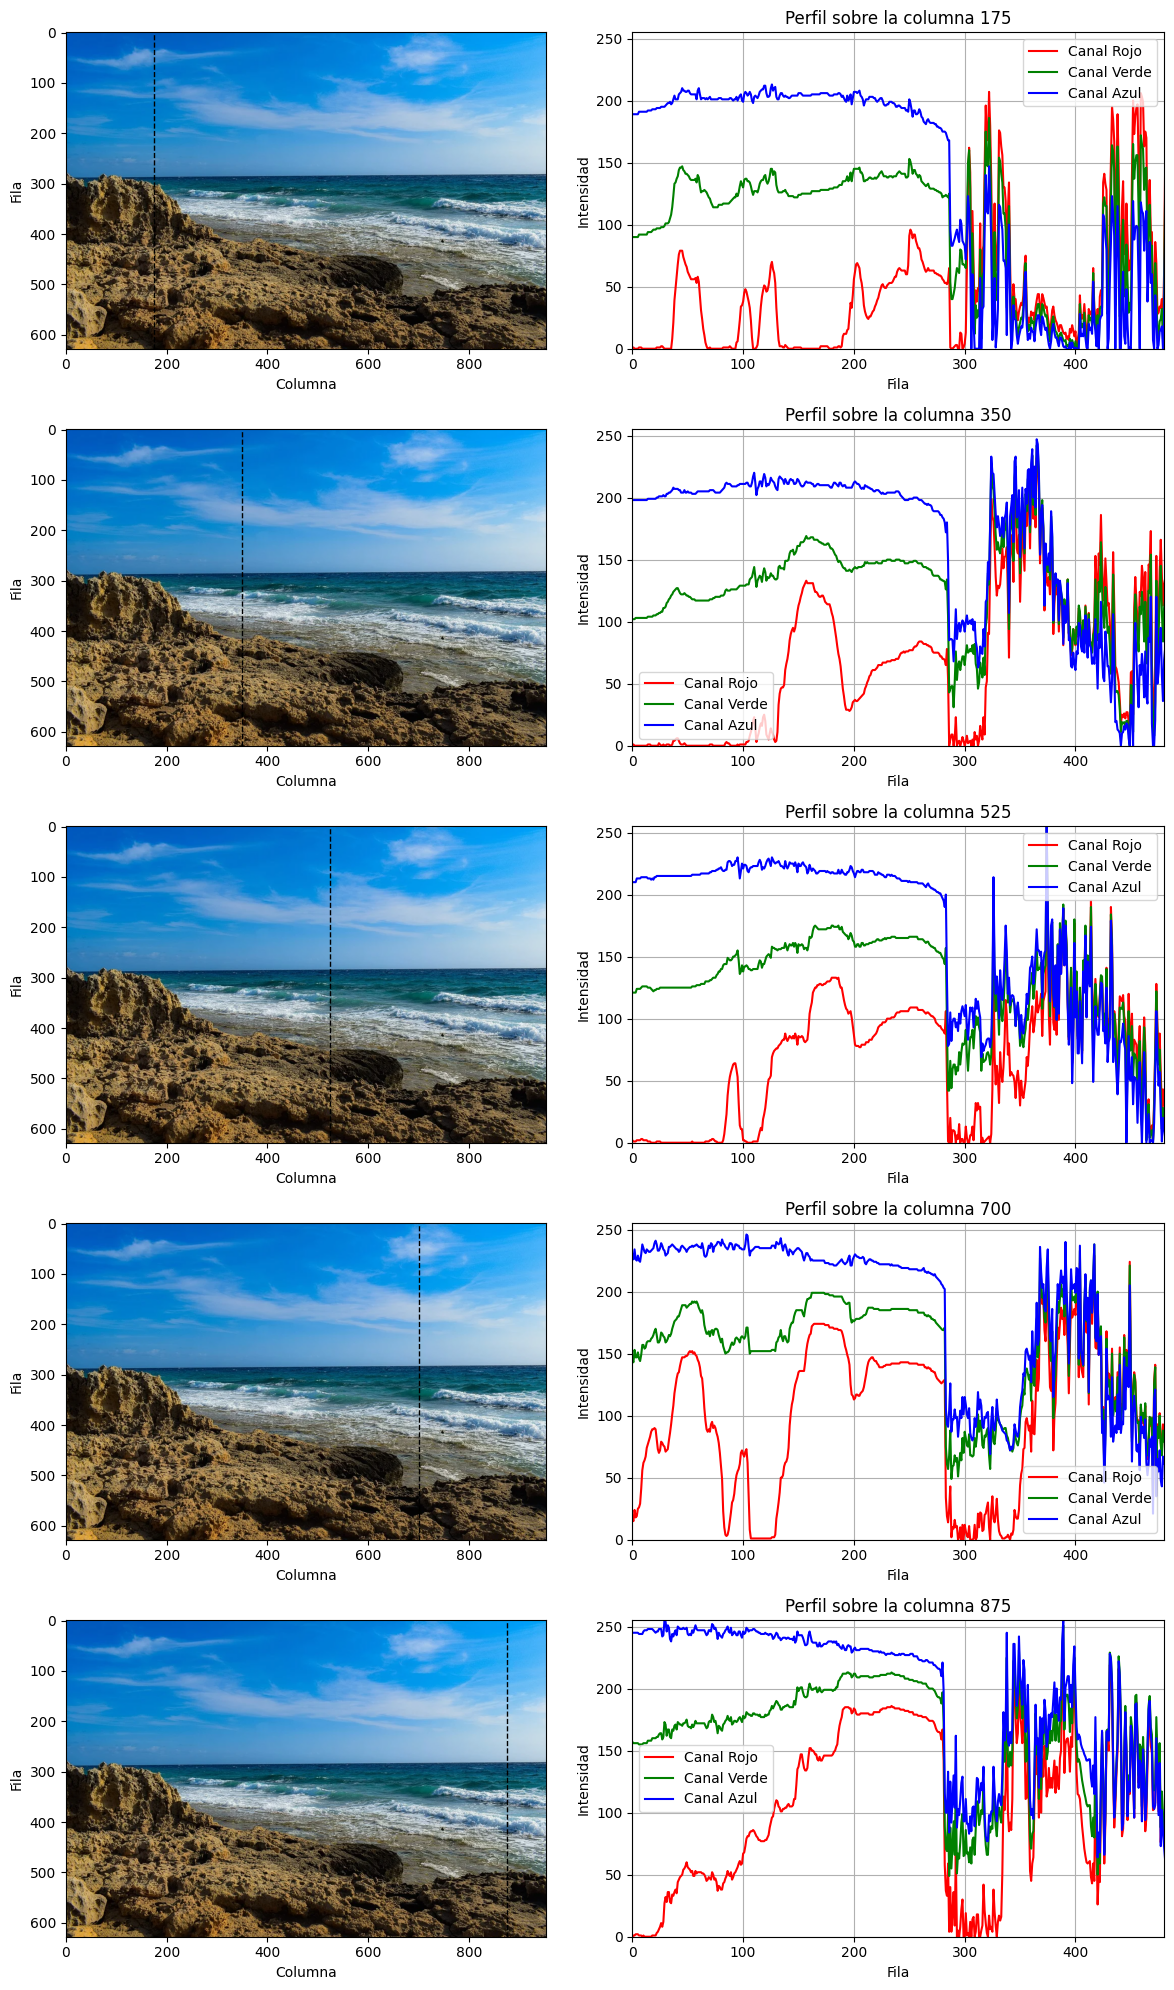

In [69]:
# Crear una figura con múltiples subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 20))

columnas = [175, 175*2, 175*3, 175*4, 175*5]

# Recorrer los valores de "columna" y generar los perfiles de color
for i, columna in enumerate(columnas):
    # Calcular los perfiles de colores rojo, verde y azul para la columna seleccionada
    perfil_color = image_rgb[:, columna, :]
    
    # Mostrar los perfiles de colores en el subplot correspondiente
    axes[i, 0].imshow(image_rgb)
    axes[i, 0].axvline(x=columna, color='black', linestyle='--', linewidth=1)
    axes[i, 0].set_xlabel('Columna')
    axes[i, 0].set_ylabel('Fila')
    
    axes[i, 1].plot(perfil_color[:, 0], color='red', label='Canal Rojo')
    axes[i, 1].plot(perfil_color[:, 1], color='green', label='Canal Verde')
    axes[i, 1].plot(perfil_color[:, 2], color='blue', label='Canal Azul')
    axes[i, 1].set_xlabel('Fila')
    axes[i, 1].set_ylabel('Intensidad')
    axes[i, 1].set_title(f'Perfil sobre la columna {columna}')
    axes[i, 1].grid()
    axes[i, 1].set_xlim(0, 480)
    axes[i, 1].set_ylim(0, 255)
    axes[i, 1].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

In [199]:
# Definir el rango de color para el agua en RGB
lower_blue = np.array([0, 20, 25], dtype=np.uint8)
upper_blue = np.array([50, 120, 175], dtype=np.uint8)

# Crear una máscara utilizando los rangos de color
mask_water = cv2.inRange(image_rgb, lower_blue, upper_blue)

# Aplicar la máscara a la imagen original
segmented_water = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_water)

In [93]:
# Definir el rango de color para el cielo en RGB
lower_sky = np.array([0, 0, 175], dtype=np.uint8)
upper_sky = np.array([255, 255, 255], dtype=np.uint8)

# Crear una máscara utilizando los rangos de color
mask_sky = cv2.inRange(image_rgb, lower_sky, upper_sky)

# Aplicar la máscara a la imagen original
segmented_sky = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_sky)

In [179]:
# Definir el rango de color para la tierra en RGB
lower_land = np.array([50, 105, 0], dtype=np.uint8)
upper_land = np.array([255, 255, 110], dtype=np.uint8)

# Crear una máscara utilizando los rangos de color
mask_land = cv2.inRange(image_rgb, lower_land, upper_land)

# Aplicar la máscara a la imagen original
segmented_land = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_land)

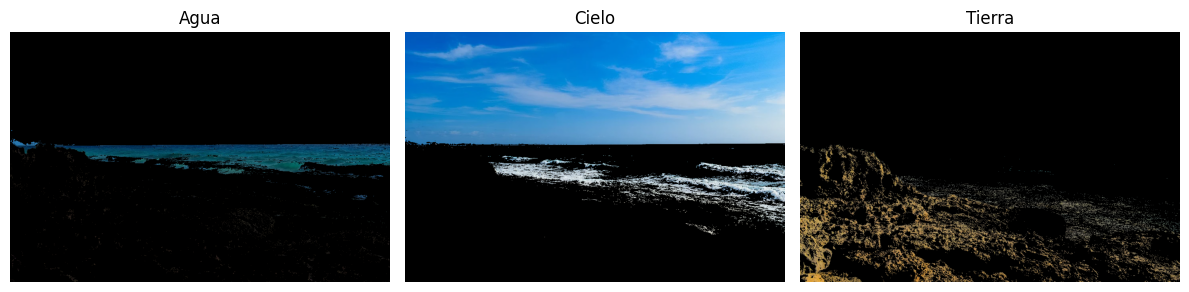

In [200]:
# Crear una figura con subplots para mostrar las regiones segmentadas
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Mostrar la región segmentada del agua
axes[0].imshow(segmented_water)
axes[0].set_title('Agua')
axes[0].axis('off')

# Mostrar la región segmentada del cielo
axes[1].imshow(segmented_sky)
axes[1].set_title('Cielo')
axes[1].axis('off')

# Mostrar la región segmentada de la tierra
axes[2].imshow(segmented_land)
axes[2].set_title('Tierra')
axes[2].axis('off')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()